<a href="https://colab.research.google.com/github/HanHsunShih/weblog-of-Thesis/blob/main/fish_drawn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install psd-tools
import os

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Export layers from psd and save as PNG file
from psd_tools import PSDImage
from PIL import Image

# path to PSD file
psd = PSDImage.open('/content/drive/MyDrive/Thesis/fish_drawn_dataset/2309190947.psd')

# create folder to save image output from psd file
output_folder = '/content/drive/MyDrive/Thesis/fish_drawn_dataset/PNG images'
os.makedirs(output_folder, exist_ok=True)

number_of_png = None

for index, layer in enumerate(psd):
    # use layer's name as file name
    layer_name = f'layer_{index}.png'
    output_path = os.path.join(output_folder, layer_name)

    # save as PNG file
    layer_image = layer.topil()
    layer_image.save(output_path, 'PNG')

    number_of_png = index
    print(f'Saved layer {layer_name}')

if number_of_png is not None:
    print(f'Number of PNG images saved: {number_of_png + 1}')
else:
    print('No PNG images were saved')

Saved layer layer_0.png
Saved layer layer_1.png
Saved layer layer_2.png
Saved layer layer_3.png
Saved layer layer_4.png
Saved layer layer_5.png
Saved layer layer_6.png
Saved layer layer_7.png
Saved layer layer_8.png
Saved layer layer_9.png
Saved layer layer_10.png
Saved layer layer_11.png
Saved layer layer_12.png
Saved layer layer_13.png
Saved layer layer_14.png
Saved layer layer_15.png
Saved layer layer_16.png
Saved layer layer_17.png
Saved layer layer_18.png
Saved layer layer_19.png
Saved layer layer_20.png
Saved layer layer_21.png
Saved layer layer_22.png
Saved layer layer_23.png
Saved layer layer_24.png
Saved layer layer_25.png
Saved layer layer_26.png
Saved layer layer_27.png
Saved layer layer_28.png
Saved layer layer_29.png
Saved layer layer_30.png
Saved layer layer_31.png
Saved layer layer_32.png
Saved layer layer_33.png
Saved layer layer_34.png
Saved layer layer_35.png
Saved layer layer_36.png
Saved layer layer_37.png
Saved layer layer_38.png
Saved layer layer_39.png
Saved laye

In [ ]:
# Resize PNG file
from PIL import Image

#number_of_png = 122
png_folder = "/content/drive/MyDrive/Thesis/fish_drawn_dataset/PNG images"
output_folder = "/content/drive/MyDrive/Thesis/fish_drawn_dataset/Resized images"
target_size = (128, 128)

def expand2square(pil_img, background_color):
    width, height = pil_img.size
    max_size = max(width, height)
    new_img = Image.new(pil_img.mode, (max_size, max_size), background_color)
    new_img.paste(pil_img, ((max_size - width) // 2, (max_size - height) // 2))
    return new_img

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

for i in range(number_of_png):
    # Load the PNG image
    png_path = os.path.join(png_folder, f"layer_{i+1}.png")
    png = Image.open(png_path)
    #print()

    # Resize the image to the target size
    resized = expand2square(png, (255, 255, 255, 255)).resize(target_size)
    #resized = expand2square(png.resize(target_size), (255, 192, 203, 255))
    #display(resized)

     # Create a new image with white background
    new_img = Image.new("RGB", target_size, (255, 255, 255))

    # Composite the resized image onto the new image while preserving transparency
    new_img.paste(resized, (0, 0), mask=resized.split()[3])

    # Convert and save as JPG
    jpg_path = os.path.join(output_folder, f"{i+1}.jpg")
    new_img.save(jpg_path)

    #print(f"Processed image {i+1}/{number_of_png}")

print("Resizing complete!")

Resizing complete!


In [ ]:
# data augmentation


https://www.youtube.com/watch?v=V5Zttmmtp6Y&ab_channel=AKPython

↑convert to pencil sketch style

In [ ]:
#pencil sketch
import cv2
from google.colab.patches import cv2_imshow

jpg_folder = "/content/drive/MyDrive/Thesis/fish_drawn_dataset/Resized images"
output_folder = "/content/drive/MyDrive/Thesis/fish_drawn_dataset/Pencil_sketch images "

for i in range(number_of_png):
    image_path = os.path.join(jpg_folder, f"{i+1}.jpg")
    image = cv2.imread(image_path)
    #image = cv2.imread("/content/drive/MyDrive/Thesis/fish_drawn_dataset/Resized images/1.jpg")
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    inverted = 255-gray_image
    blurred = cv2.GaussianBlur(inverted,(21,21),0)
    inverted_blur = 255-blurred
    pencil_sketch = cv2.divide(gray_image, inverted_blur, scale = 256.0)
    #cv2_imshow(pencil_sketch)

    #save the file
    output_path = os.path.join(output_folder, f"{i+1}.jpg")
    cv2.imwrite(output_path, pencil_sketch)

print("Pencil sketch style convert complete!")

Pencil sketch style convert complete!


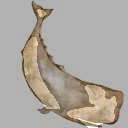

In [ ]:
#ChatGPT提供的scribble效果，效果不好
import cv2
import numpy as np
#為什麼需要 numpy? Ans: 展開黑色畫布用 (建立一個都為 0的三維矩陣)。

def create_scribble_style(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur to the grayscale image
    blurred = cv2.GaussianBlur(gray_image, (21, 21), 0)

    # Invert the blurred image to create a "negative" effect
    inverted = 255 - blurred

    # Apply threshold to create a binary image
    _, thresholded = cv2.threshold(inverted, 100, 255, cv2.THRESH_BINARY)

    # Create a scribble-style image by combining the thresholded image with the original image
    scribble_image = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)
    scribble_style = cv2.addWeighted(image, 0.7, scribble_image, 0.3, 0)

    return scribble_style

# Load an image
image = cv2.imread("/content/drive/MyDrive/Thesis/fish_drawn_dataset/Resized images/1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply the scribble style transformation
scribble_image = create_scribble_style(image)

# Display the result
cv2_imshow(scribble_image)


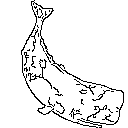

In [ ]:
#Canny
import cv2
from google.colab.patches import cv2_imshow

# Load an image
image_path = "/content/drive/MyDrive/Thesis/fish_drawn_dataset/Resized images/1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

# invert
inverted = 255-edges

# Display the Canny edge image
cv2_imshow(inverted)


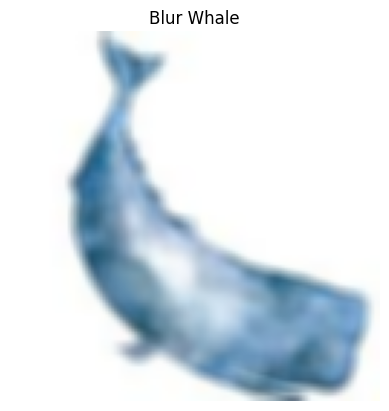

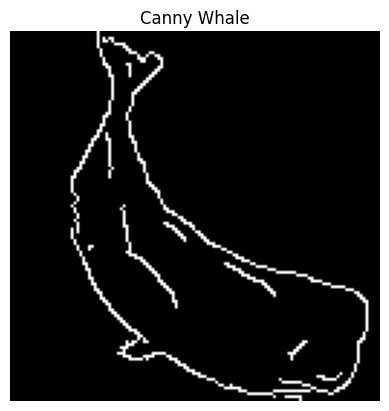

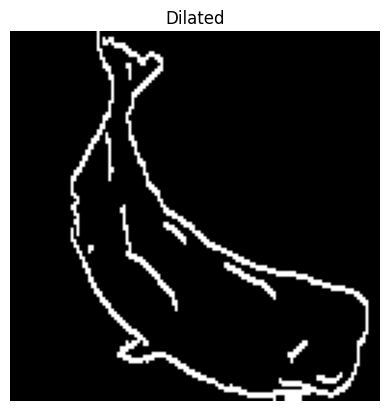

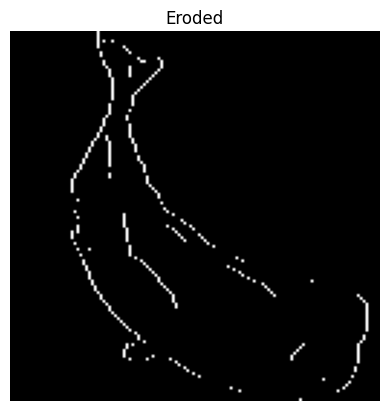

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/Thesis/fish_drawn_dataset/Resized images/1.jpg")
# blur
blur = cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title("Blur Whale")
plt.axis('off')
plt.show()

# edge cascade
canny = cv2.Canny(blur, 125, 175)
plt.imshow(canny, cmap='gray')
plt.title("Canny Whale")
plt.axis('off')
plt.show()

# 膨脹 dilating
dilated = cv2.dilate(canny, (7,7), iterations=1)
plt.imshow(dilated, cmap='gray')
plt.title("Dilated")
plt.axis('off')
plt.show()

# 侵蝕 eroding
eroded = cv2.erode(canny, (3,3), iterations=1)
plt.imshow(eroded, cmap='gray')
plt.title("Eroded")
plt.axis('off')
plt.show()
